In [10]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import time
from mpl_toolkits import mplot3d

## ODE Solver Tests

## Lorenz Attractor/Systems of ODES

In [292]:
def lorenz_scipy(r,t):
    sigma=10;beta=8/3;rho=28
    x,y,z=r
    return sigma*(y-x),x*(rho-z)-y,x*y - beta*z

def lorenz(t,r):
    sigma=10;beta=8/3;rho=28
    x,y,z=r.T
    return np.block([[sigma*((y)-(x))],[(x)*(rho-z)-(y)],[(x)*(y) - beta*(z)]]).T

In [197]:
n=1000
f=np.zeros((n,3))
t=0
dt=0.02
f[0,:] = 1.0
for i in range(n-1):
    f[i+1,:] = f[i,:] + dt*lorenz(t,f[i,:])

In [294]:
n=4000
t=0
dt=0.01
f=np.zeros((n,3))
f[0,:] = 1.0
for i in range(n-1):
    f1=dt*lorenz(t,f[i,:])
    f2=dt*lorenz(t+(dt/2),f[i,:]+(f1/2))
    f3=dt*lorenz(t+(dt/2),f[i,:]+(f2/2))
    f4=dt*lorenz(t+dt,f[i,:]+f3)
    f[i+1,:]=f[i,:]+(f1/6)+(f2/3)+(f3/3)+(f4/6)
    t+=dt
# np.savetxt("../lorenz.dat",f)

In [296]:
rt=forward_euler(lorenz,np.ones(3),0,40,4000)
rt,f

[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


(array([[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.00650163,  0.99958323],
        [ 1.00001626,  1.01300173,  0.99916836],
        ...,
        [-9.31524825, -8.37788656, 29.1894191 ],
        [-9.31290426, -8.37302094, 29.18947003],
        [-9.31055396, -8.36815712, 29.18950468]]),
 array([[  1.        ,   1.        ,   1.        ],
        [  1.01256719,   1.2599178 ,   0.98489097],
        [  1.04882371,   1.52399713,   0.97311422],
        ...,
        [-11.79833827,  -0.41663267,  40.71796679],
        [-10.64700184,   0.94830598,  39.61546013],
        [ -9.48850465,   2.04412394,  38.42307037]]))

In [264]:
t=np.arange(0,40,0.01)
rs=odeint(lorenz_scipy,[1,1,1],np.arange(0,40,0.01))
rs.shape

(4000, 3)

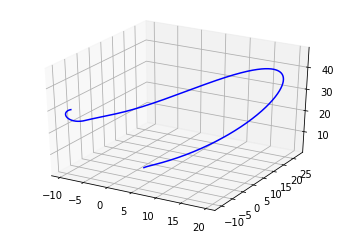

In [289]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(rs[:,0], rs[:,1], rs[:,2],c='r')
ax.plot(rt[:,0], rt[:,1], rt[:,2],c='b')
plt.show()

In [201]:
x1,y1,z1=np.loadtxt("../lorenz.dat").T

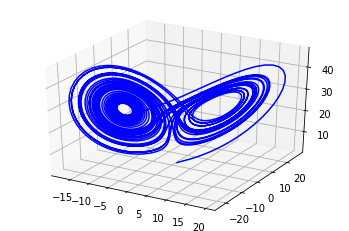

In [288]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(rs[:,0], rs[:,1], rs[:,2],c='r')
ax.plot(f[:,0], f[:,1], f[:,2],c='b')
# ax.plot(x1, y1, z1,c='c')
plt.show()

## ODE Test Problem
### Test Problem
$$y' + 2y = 2 - {{\bf{e}}^{ - 4t}}\hspace{0.25in}y\left( 0 \right) = 1$$
### Exact Solution
$$y\left( t \right) = 1 + \frac{1}{2}{{\bf{e}}^{ - 4t}} - \frac{1}{2}{{\bf{e}}^{ - 2t}}$$

In [32]:
def func(x,y):
    return 2.0-np.exp(-4*x)-2*y
def exact(x):
    return 1.0+0.5*np.exp(-4*x)-0.5*np.exp(-2*x)

### Solvers

Relative L2 Error =  0.011393448514644033 8.315774295274754e-05 1.0055437828051269e-07
Relative L2 Error =  0.009370703152550047 5.488754029544991e-05 4.644184204299218e-08
Relative L2 Error =  0.007958152930260741 3.888896039023783e-05 2.4312196879399515e-08
Relative L2 Error =  0.006915798226891554 2.8975554132368205e-05 1.392966148569543e-08
Relative L2 Error =  0.006114938186167494 2.2415252078914357e-05 8.543819678748839e-09
Relative L2 Error =  0.005480345124958531 1.7851890502822092e-05 5.527141974311386e-09
Relative L2 Error =  0.004965102247081181 1.455094454114952e-05 3.731946112937826e-09
Relative L2 Error =  0.0045384292586949666 1.2086726869927193e-05 2.60992819534368e-09
Relative L2 Error =  0.004179293450175348 1.0198820667448706e-05 1.87963402933932e-09
Relative L2 Error =  0.0038728337976455802 8.720704244476315e-06 1.3878210754602373e-09


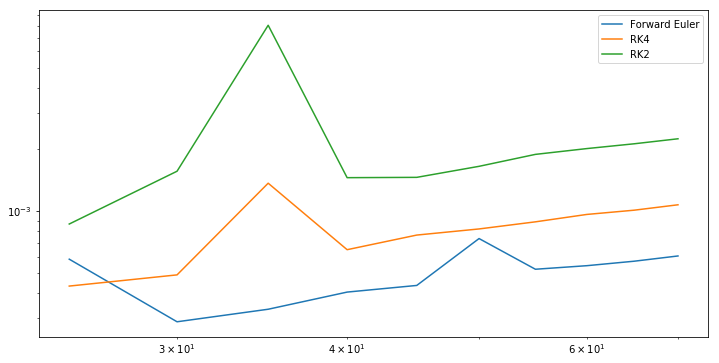

In [309]:
errs=[];ts=[]
a=0;b=1;ic=np.ones(1)
ns=[5*i for i in range(5,15)]
for n in ns:
    t1=time.time()
    yt0=forward_euler(func,ic,a,b,n)
    t2=time.time()
#     print(t2-t1)
    ts.append(t2-t1)
    
    t1=time.time()
    yt1=rk2(func,ic,a,b,n)
    t2=time.time()
#     print(t2-t1)
    ts.append(t2-t1)
    
    t1=time.time()
    yt2=rk4(func,ic,a,b,n)
    t2=time.time()
#     print(t2-t1)
    ts.append(t2-t1)
    
    tt=np.linspace(a,b,n)
    errs.append([relerr(yt0[:,0],exact(tt)),\
                 relerr(yt1[:,0],exact(tt)),\
                 relerr(yt2[:,0],exact(tt))])
    print("Relative L2 Error = ",relerr(yt0[:,0],exact(tt)),\
          relerr(yt1[:,0],exact(tt)),\
          relerr(yt2[:,0],exact(tt)))
    
    
errs=np.array(errs)
ts=np.array(ts).reshape(errs.shape)
plt.figure(figsize=(12,6))
plt.loglog(ns,ts[:,0],label='Forward Euler')
plt.loglog(ns,ts[:,1],label='RK4')
plt.loglog(ns,ts[:,-1],label='RK2')
plt.legend()

### Numerical Solution Comparison

Text(0, 0.5, 'y(x)')

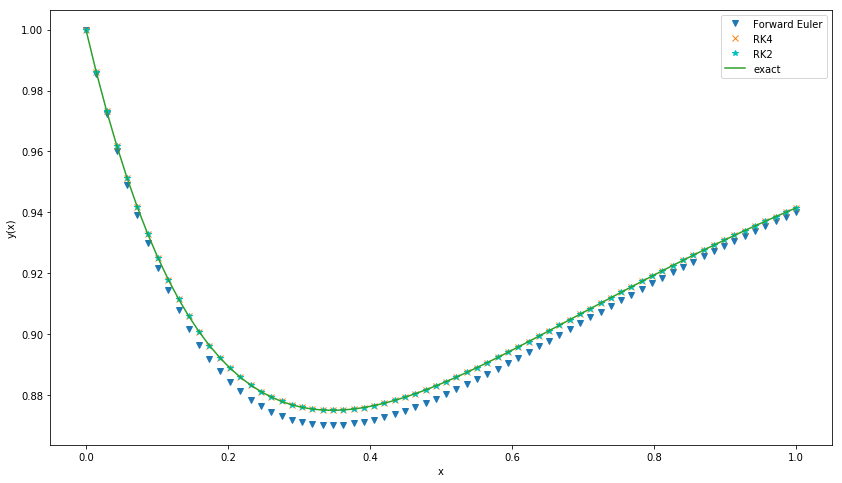

In [310]:
plt.figure(figsize=(14,8))
plt.plot(tt,yt0,'v',label='Forward Euler')
plt.plot(tt,yt1,'x',label='RK4')
plt.plot(tt,yt2,'c*',label='RK2')
plt.plot(tt,exact(tt),'-',label='exact')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')

Order of Accuracy
RK4 4.159754217444606 RK2 2.1901678302977516 Forward Euler 1.0480105502722559
RK4 4.237007686420089 RK2 2.278682558842317 Forward Euler 1.0720090676306495
RK4 4.198636478030479 RK2 2.2353190700698837 Forward Euler 1.059944773429418
RK4 4.170986734062799 RK2 2.2036608502751966 Forward Euler 1.0513522975069836
RK4 4.150107922536761 RK2 2.17952346511825 Forward Euler 1.044919001721117
RK4 4.13378118292152 RK2 2.160507747853374 Forward Euler 1.0399207128215042
RK4 4.120661791294151 RK2 2.1451381702514722 Forward Euler 1.0359248857807168
RK4 4.10988937847201 RK2 2.1324568951387017 Forward Euler 1.032657108036408
RK4 4.100880973258603 RK2 2.121814838353168 Forward Euler 1.0299348327071742
RK4 4.093245817231016 RK2 2.11275644948749 Forward Euler 1.0276318787922425


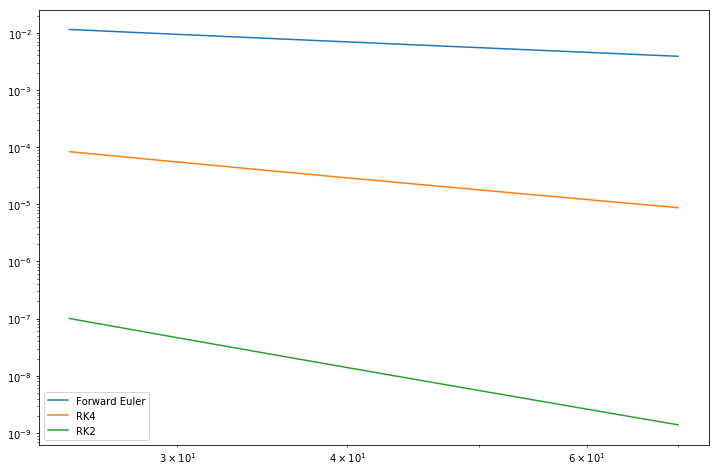

In [312]:
plt.figure(figsize=(12,8))
plt.loglog(ns,errs[:,0],label='Forward Euler')
plt.loglog(ns,errs[:,1],label='RK4')
plt.loglog(ns,errs[:,-1],label='RK2')
plt.legend()
ps=[]
for j in range(len(errs[0,:])):
#     print(j)
    etmp=errs[:,j]
#     print(etmp)
    for i in range(len(ns)):
        p=-np.log(etmp[i-1]/etmp[i])/np.log(ns[i-1]/ns[i])
        ps.append(p)
ps = np.array(ps).reshape(errs.T.shape)


ords=zip(ps[0,:].tolist(),\
    ps[1,:].tolist(),\
    ps[2,:].tolist())
print("Order of Accuracy")
for ofe,ork2,ork4 in ords:
    print("RK4",ork4,"RK2",ork2,"Forward Euler",ofe)

## Member Functions

### Helper Functions

In [250]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))

def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

def cond(A):
    return np.linalg.cond(A)

def norm(M):
    return np.linalg.norm(M,2)

def inv(A):
    return np.linalg.inv(A)

In [303]:
def rk2(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
 
    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+k,u[i,:]+u1)
        u[i+1,:]=u[i]+(u1+u2)/2
    return u

def rk4(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
    
    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+(k/2),u[i,:]+(u1/2))
        u3=k*f(t[i]+(k/2),u[i,:]+(u2/2))
        u4=k*f(t[i]+k,u[i,:]+u3)
        u[i+1,:]=u[i]+(u1/6)+(u2/3)+(u3/3)+(u4/6)
    return u

def forward_euler(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
    
    for i in range(n-1):
        u[i+1,:]=u[i,:]+k*f(t[i],u[i,:])
        
    return u